# Digit Number

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np

np.random.seed(4)

## Dataset

In [2]:

mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)


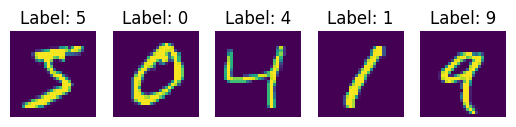

In [3]:
# show
num_imgs = 5
fig, axes = plt.subplots(1, num_imgs)
for i in range(num_imgs):
    axes[i].imshow(X[i].reshape(28,28))
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()

## Pre-Processing

In [4]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def sigmoid(x):

    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [7]:
def forward_prop(w1, w2, b1, b2, x):
    z1 = x @ w1 + b1
    h1 = sigmoid(z1)

    z2 = h1 @ w2 + b2
    y_hat = sigmoid(z2)

    return z1, h1, z2, y_hat

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    dz2 = y_hat - y
    dw2 = h1.T @ dz2
    db2 = np.ones((1,m)) @ dz2 / m

    dz1 = dz2 @ w2.T * sigmoid_prime(h1)
    dw1 = x.T @ dz1

    db1 = np.ones((1,m)) @ dz1 / m

    return dw1, db1, dw2, db2
    pass

## Initialization

In [8]:
## Initialize weights
n_x = X_train.shape[1]
n_y = y_train.shape[1]
n_h = 100

w1 = np.random.rand(n_x, n_h) - 0.5
w2 = np.random.rand(n_h, n_y) - 0.5
b1 = np.random.rand(1, n_h) - 0.5
b2 = np.random.rand(1, n_y) - 0.5

## Main Loop

In [9]:
epoch = 30
losses = []
m = y_train.shape[0]        # of data set
lr = 0.01                   # Learning rate

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)
for i in range(epoch):
    z1, a1, z2, y_hat = forward_prop(w1, w2, b1, b2, X_train)
    loss = -(1/m) * np.sum(y_train * np.log(y_hat + 1e-10) + (1-y_train)*np.log(1-y_hat+1e-10))

    losses.append(loss)

    dw1, db1, dw2, db2 = back_prop(m,w1,w2,z1,a1,z2,y_hat,X_train,y_train)
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

    b2 = b2 - lr * db2
    b1 = b1 - lr * db1

    print(f'loss: {loss}')

loss: 7.862787070527112
loss: 41.457222246718935
loss: 41.21939602001462
loss: 44.322213370817344
loss: 24.244484037920216
loss: 25.085660769440214
loss: 40.98787024898897
loss: 45.98855818444205
loss: 26.217540929525434
loss: 28.090226106233935
loss: 20.38737869311946
loss: 18.679223100004922
loss: 22.300543158052015
loss: 17.261754708416124
loss: 14.234768289358929
loss: 13.304205942274837
loss: 12.53498234024039
loss: 11.758791319884178
loss: 14.258909790888914
loss: 17.03586375639763
loss: 12.854193823814963
loss: 14.303639151047744
loss: 13.47702477792577
loss: 11.1418756273927
loss: 11.779950605992529
loss: 10.865521317878816
loss: 10.12921926027023
loss: 8.434598714105855
loss: 9.043357339978035
loss: 7.942675569074206


## Loss

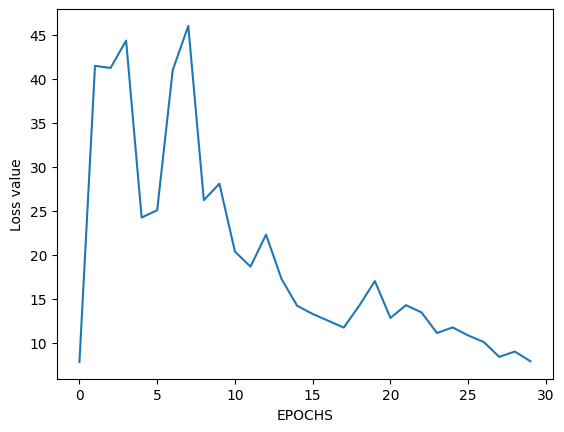

In [10]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Accuracy

In [11]:
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

loss: 7.94, acc: 0.83
